### List of what we did it

1. **Define the Problem**
   - [X] We need predict the taxi ride price  
   - [ ] Specify success metrics (like MAPE and MAE)

2. **Data Cleaning and Exploration**
   - [X] Handle missing or null values  
   - [X] Remove duplicates  
   - [X] Filter out invalid/negative data  
   - [X] Visualize distributions (histograms, scatter plots)  
   - [X] Feature engineering (calculate distances, extract date components)
   - [X] Standardize or scale numerical features 

4. **Exploratory Data Analysis (EDA)**
   - [X] Analyze correlations  
   - [ ] Identify outliers  

5. **Preprocessing and Feature Selection**
 
   - [X] Encode categorical variables (if any)  
   - [ ] Split data into training and testing sets  

6. **Model Selection**
   - [ ] Train baseline models:
       - [ ] Linear Regression  
       - [ ] Decision Tree Regressor  
       - [ ] Random Forest Regressor  
   - [ ] Test advanced models (e.g., XGBoost, LightGBM)  
   - [ ] Use GridSearchCV/RandomizedSearchCV for hyperparameter tuning  

7. **Model Evaluation**
   - [ ] Calculate evaluation metrics (MAE, RMSE, R2)  
   - [ ] Visualize actual vs predicted values  

8. **Optimization**
   - [ ] Tune hyperparameters  
   - [ ] Test feature selection  


9. **Documentation and Presentation**
    - [ ] Summarize findings in a Jupyter Notebook or report  
    - [ ] Prepare visualizations for storytelling  
    - [ ] Create a final presentation with key insights  


In [194]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [195]:
data = pd.read_csv("taxi_trip_pricing.csv")
data = pd.DataFrame(data)

# 1 - **Define the Problem**

In [196]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [197]:
data.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

We have a lot of missing values in all columns

In [198]:
data.shape

(1000, 11)

Each colunm has more or less 50 errors

In [199]:
print(f" {(50/1000) * 100}% of the values each column is missing")

 5.0% of the values each column is missing


So this is the **PROBLEM**.
We need to fix the data and the predict the **Trip_Price**

# 2 - **Data Cleaning and Exploration**

### 2-1 null values

In [200]:
data.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [201]:
categories = ["Time_of_Day","Day_of_Week","Weather","Traffic_Conditions"]
for categ in categories:
    print(f"{categ}: {data[categ].unique()}")

Time_of_Day: ['Morning' 'Afternoon' 'Evening' 'Night' nan]
Day_of_Week: ['Weekday' 'Weekend' nan]
Weather: ['Clear' nan 'Rain' 'Snow']
Traffic_Conditions: ['Low' 'High' 'Medium' nan]


EACH one of those we have to change to numerical 

In [202]:
print("Little legend about the Numerical Variables")
for column in categories:
    unique_values = data[column].dropna().unique()
    replace_dict = {}  
    for replacer, value in enumerate(unique_values, start=1):
        replace_dict[value] = replacer
        print(f"{column} has the value: {value} corresponds to: {replace_dict[value]}")
    data[column + "_numeric"] = data[column].map(replace_dict).fillna(0)
    data = data.drop(column, axis=1)

Little legend about the Numerical Variables
Time_of_Day has the value: Morning corresponds to: 1
Time_of_Day has the value: Afternoon corresponds to: 2
Time_of_Day has the value: Evening corresponds to: 3
Time_of_Day has the value: Night corresponds to: 4
Day_of_Week has the value: Weekday corresponds to: 1
Day_of_Week has the value: Weekend corresponds to: 2
Weather has the value: Clear corresponds to: 1
Weather has the value: Rain corresponds to: 2
Weather has the value: Snow corresponds to: 3
Traffic_Conditions has the value: Low corresponds to: 1
Traffic_Conditions has the value: High corresponds to: 2
Traffic_Conditions has the value: Medium corresponds to: 3


Filling the missing values with **interpolation**:

In [203]:
for col in data.columns:
    data[col].interpolate(method='polynomial', order=2, inplace=True)

/tmp/ipykernel_6056/675161733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].interpolate(method='polynomial', order=2, inplace=True)


In [204]:
data.isnull().sum()

Trip_Distance_km              0
Passenger_Count               0
Base_Fare                     0
Per_Km_Rate                   1
Per_Minute_Rate               0
Trip_Duration_Minutes         0
Trip_Price                    0
Time_of_Day_numeric           0
Day_of_Week_numeric           0
Weather_numeric               0
Traffic_Conditions_numeric    0
dtype: int64


No more missing values on all columns expect Trip_Price

In [205]:
data.Per_Km_Rate.fillna(data.Per_Km_Rate.mean(), inplace=True)

/tmp/ipykernel_6056/1275123542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Per_Km_Rate.fillna(data.Per_Km_Rate.mean(), inplace=True)


In [206]:
data.isnull().sum()

Trip_Distance_km              0
Passenger_Count               0
Base_Fare                     0
Per_Km_Rate                   0
Per_Minute_Rate               0
Trip_Duration_Minutes         0
Trip_Price                    0
Time_of_Day_numeric           0
Day_of_Week_numeric           0
Weather_numeric               0
Traffic_Conditions_numeric    0
dtype: int64

### 2-2 **Handling Duplicates**

In [207]:
duplicate = data[data.duplicated()]
duplicate.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_numeric,Day_of_Week_numeric,Weather_numeric,Traffic_Conditions_numeric


In [208]:
data.duplicated().sum()

np.int64(0)

In [209]:
data[data.Passenger_Count<1]

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_numeric,Day_of_Week_numeric,Weather_numeric,Traffic_Conditions_numeric
213,11.990000,0.789840,4.84,1.74,0.280000,54.06,40.8394,3.0,2.0,2.0,3.0
292,41.310000,0.649499,4.90,1.10,0.228667,21.18,56.0596,2.0,1.0,1.0,3.0
344,28.615169,0.949398,4.62,1.86,0.430000,7.19,45.8975,3.0,0.0,1.0,1.0
655,7.250000,0.515925,2.10,1.73,0.170000,19.51,17.9592,4.0,1.0,1.0,1.0


How you can see we have **NO** **DUPLICATES**!

### 2-3 **Filtering Negative and Invalid Data**

In [210]:
print(f"we have: {(data < 0).sum().sum()} negative values")

we have: 3 negative values


In [211]:
data.dtypes


Trip_Distance_km              float64
Passenger_Count               float64
Base_Fare                     float64
Per_Km_Rate                   float64
Per_Minute_Rate               float64
Trip_Duration_Minutes         float64
Trip_Price                    float64
Time_of_Day_numeric           float64
Day_of_Week_numeric           float64
Weather_numeric               float64
Traffic_Conditions_numeric    float64
dtype: object

In [212]:

negative_values = data[data < 0].stack() 
print("Negative values in the DataFrame:") 
print(negative_values)


Negative values in the DataFrame:
282  Trip_Distance_km   -0.570684
939  Trip_Distance_km   -2.320416
961  Trip_Distance_km   -0.590145
dtype: float64


Replacing all negative values with their absolute values

In [213]:
data = data.applymap(lambda x: abs(x) if x < 0 else x)

/tmp/ipykernel_6056/355186499.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: abs(x) if x < 0 else x)


In [214]:
print(f"we have: {(data < 0).sum().sum()} negative values")

we have: 0 negative values


This output means we have **NO INVALID DATA** inside our dataset

### 2-4 **Visualizing Distributions**

In [215]:
data.columns

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price',
       'Time_of_Day_numeric', 'Day_of_Week_numeric', 'Weather_numeric',
       'Traffic_Conditions_numeric'],
      dtype='object')

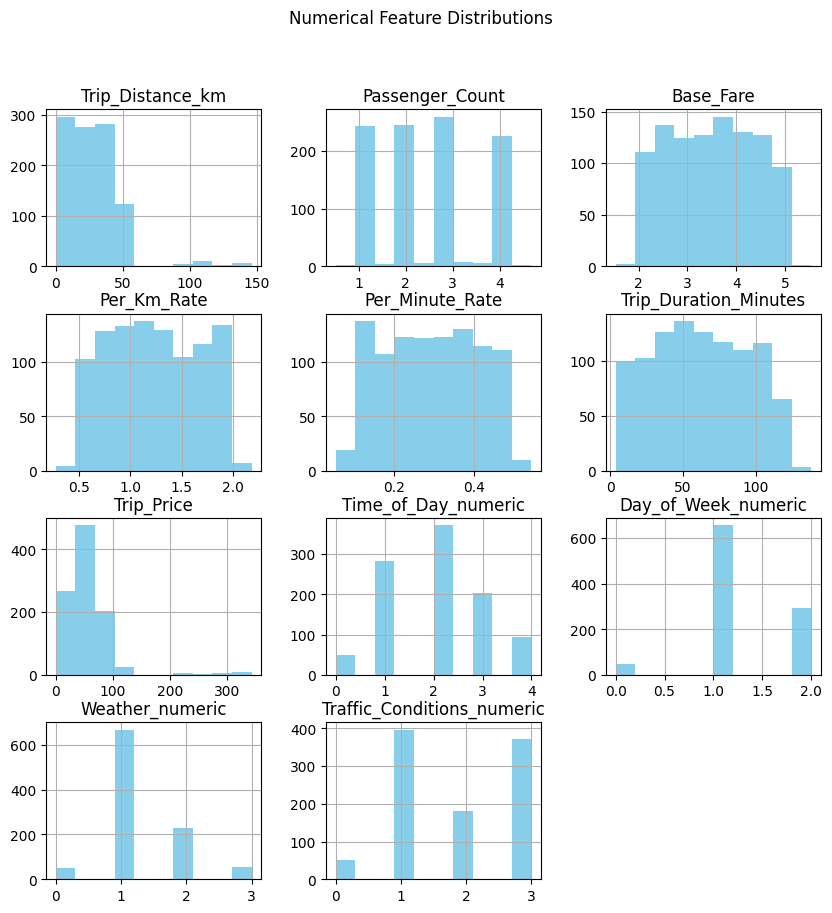

Histogram


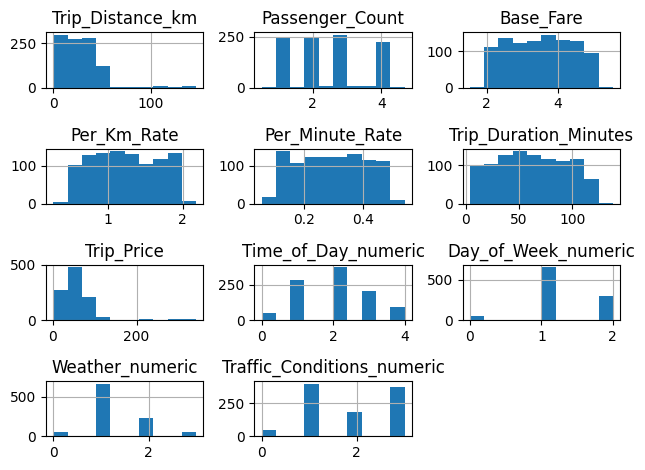

Scatter Plot for each numerical column


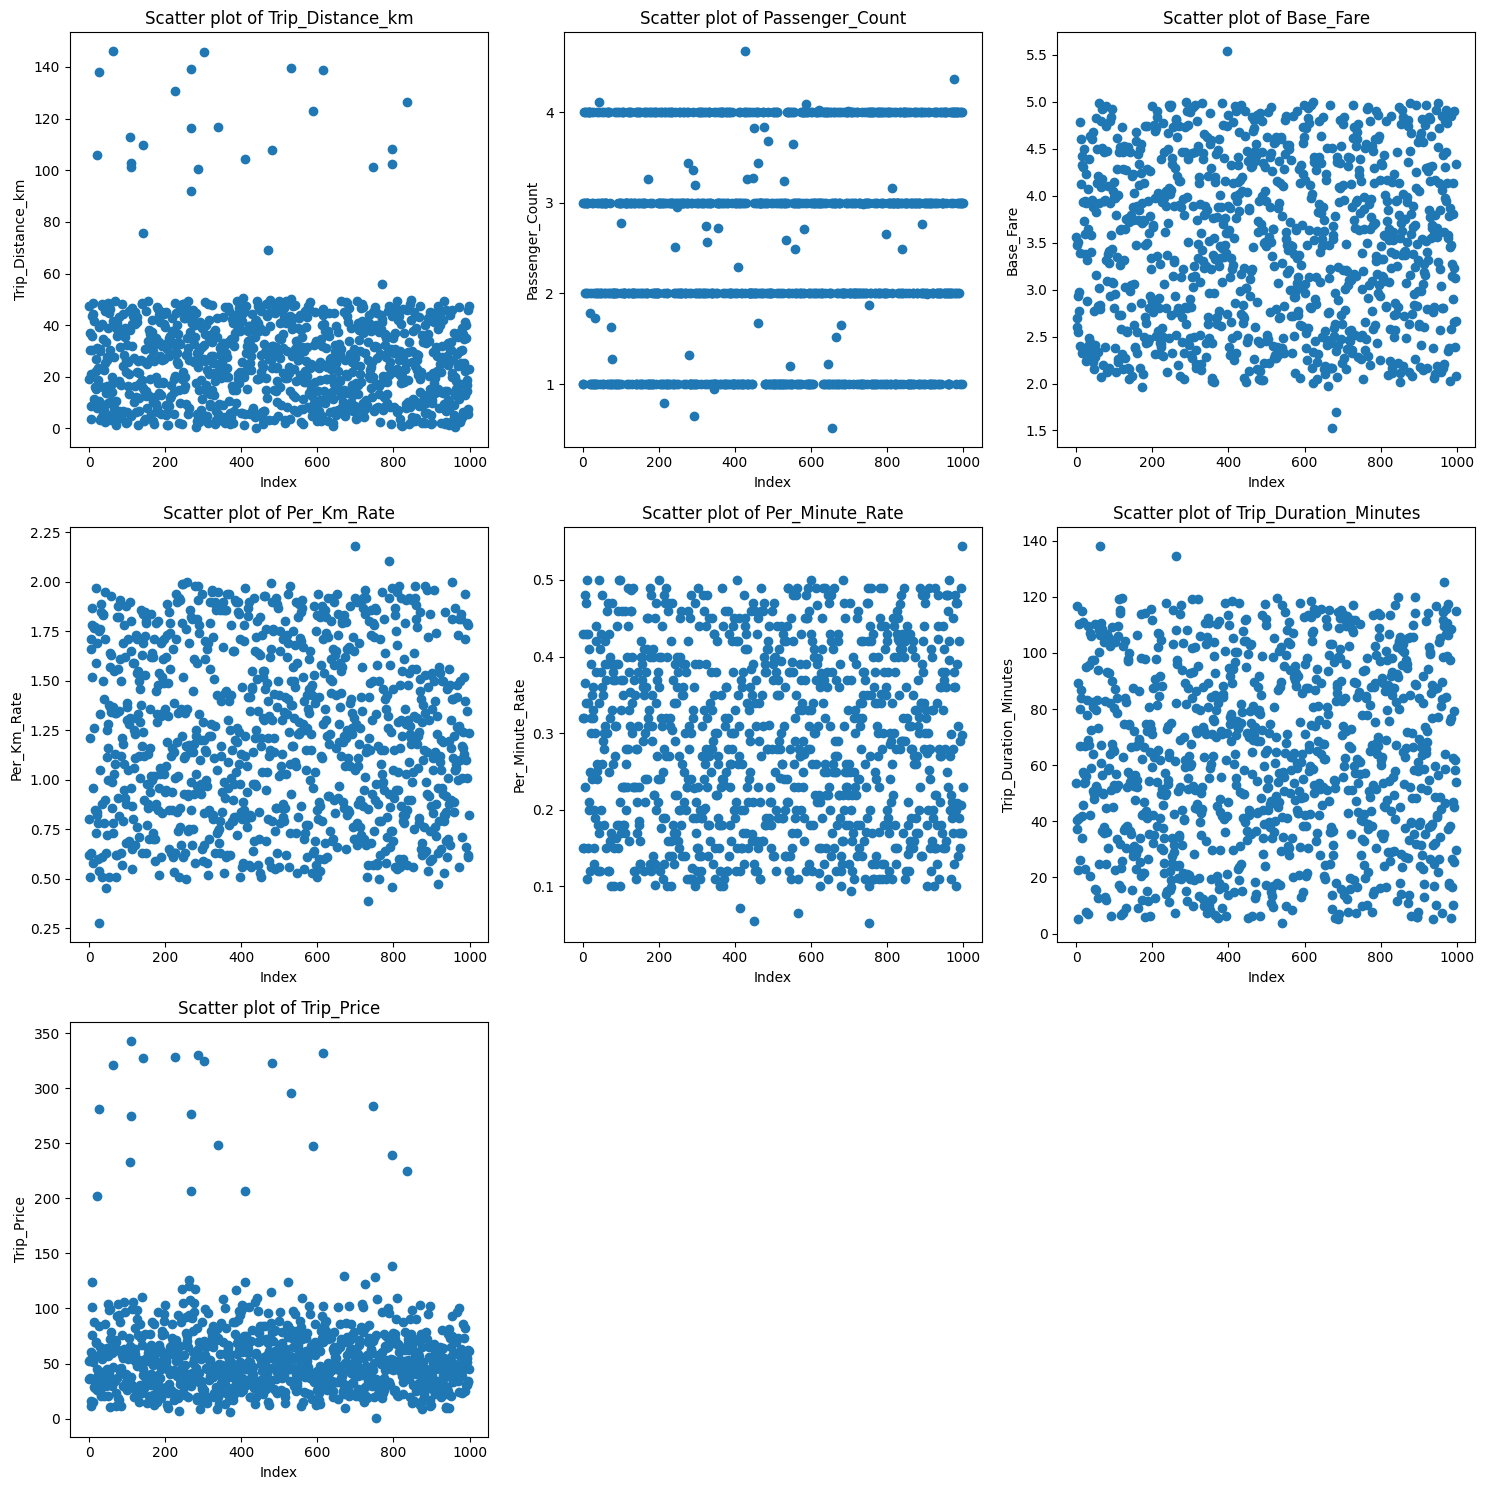

In [216]:

data[data.select_dtypes(exclude='object').columns.round(2)].hist(bins=10, figsize=(10,10) , color='skyblue')
plt.suptitle('Numerical Feature Distributions')
plt.show()

print("Histogram")
data.hist()
plt.figsize=(150, 150)
plt.tight_layout()
plt.show()

print("Scatter Plot for each numerical column")
columns_to_plot = data.drop(['Time_of_Day_numeric','Day_of_Week_numeric', 'Weather_numeric', 'Traffic_Conditions_numeric'], axis=1) 
columns = columns_to_plot.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) 
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3 
    axes[row, col].scatter(range(len(columns_to_plot)), columns_to_plot[column]) 
    axes[row, col].set_title(f'Scatter plot of {column}') 
    axes[row, col].set_xlabel('Index') 
    axes[row, col].set_ylabel(column) 
for i in range(3): 
    for j in range(3): 
        if 3 * i + j >= len(columns): 
            fig.delaxes(axes[i, j]) 
plt.tight_layout()
plt.show()

"The columns 'Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', and 'Trip_Price' contain some interesting and potentially questionable values.

For example, the 'Passenger_Count' column includes values less than 1. This is unusual, as it's expected that a taxi trip should have at least one passenger to be initiated. Such anomalies in the data could indicate issues with data entry, or they may require further investigation to determine if they represent real-world exceptions or errors."
How we can see better here:

In [217]:
columns_poss_outliers = numerical_columns
for column in columns_poss_outliers[0:7]:
    print(f"{column}\n  MAX VALUE: {data[column].max()}\n  MINIMUM VALUE: {data[column].min()}\n  THE MEDIAN VALUES: {data[column].median()}") 

Trip_Distance_km
  MAX VALUE: 146.0670471598387
  MINIMUM VALUE: 0.23510077773595395
  THE MEDIAN VALUES: 25.895000000000003
Passenger_Count
  MAX VALUE: 4.672718167097251
  MINIMUM VALUE: 0.5159252887077136
  THE MEDIAN VALUES: 2.574931660483039
Base_Fare
  MAX VALUE: 5.538429327950217
  MINIMUM VALUE: 1.5277268263543602
  THE MEDIAN VALUES: 3.53
Per_Km_Rate
  MAX VALUE: 2.18009544739083
  MINIMUM VALUE: 0.2775622007032884
  THE MEDIAN VALUES: 1.22
Per_Minute_Rate
  MAX VALUE: 0.5439575073663427
  MINIMUM VALUE: 0.05253429138589473
  THE MEDIAN VALUES: 0.29
Trip_Duration_Minutes
  MAX VALUE: 138.07310209888385
  MINIMUM VALUE: 3.7867383057478863
  THE MEDIAN VALUES: 61.715
Trip_Price
  MAX VALUE: 342.7994529905674
  MINIMUM VALUE: 0.6437850247658492
  THE MEDIAN VALUES: 50.3725
Time_of_Day_numeric
  MAX VALUE: 4.0
  MINIMUM VALUE: 0.0
  THE MEDIAN VALUES: 2.0
Day_of_Week_numeric
  MAX VALUE: 2.0
  MINIMUM VALUE: 0.0
  THE MEDIAN VALUES: 1.0
Weather_numeric
  MAX VALUE: 3.0
  MINIMUM V

In [218]:
data[data < 1].count()

Trip_Distance_km                 4
Passenger_Count                  4
Base_Fare                        0
Per_Km_Rate                    344
Per_Minute_Rate               1000
Trip_Duration_Minutes            0
Trip_Price                       1
Time_of_Day_numeric             50
Day_of_Week_numeric             50
Weather_numeric                 50
Traffic_Conditions_numeric      50
dtype: int64

First let's just rapidly fix the pasenger count

In [219]:
data.loc[data['Passenger_Count'] < 1] = 1


In [220]:
data[data < 1].count()

Trip_Distance_km                4
Passenger_Count                 0
Base_Fare                       0
Per_Km_Rate                   344
Per_Minute_Rate               996
Trip_Duration_Minutes           0
Trip_Price                      1
Time_of_Day_numeric            50
Day_of_Week_numeric            49
Weather_numeric                50
Traffic_Conditions_numeric     50
dtype: int64

# 3 - **Exploratory Data Analysis (EDA)**

### 3-1 **Analyze correlations**

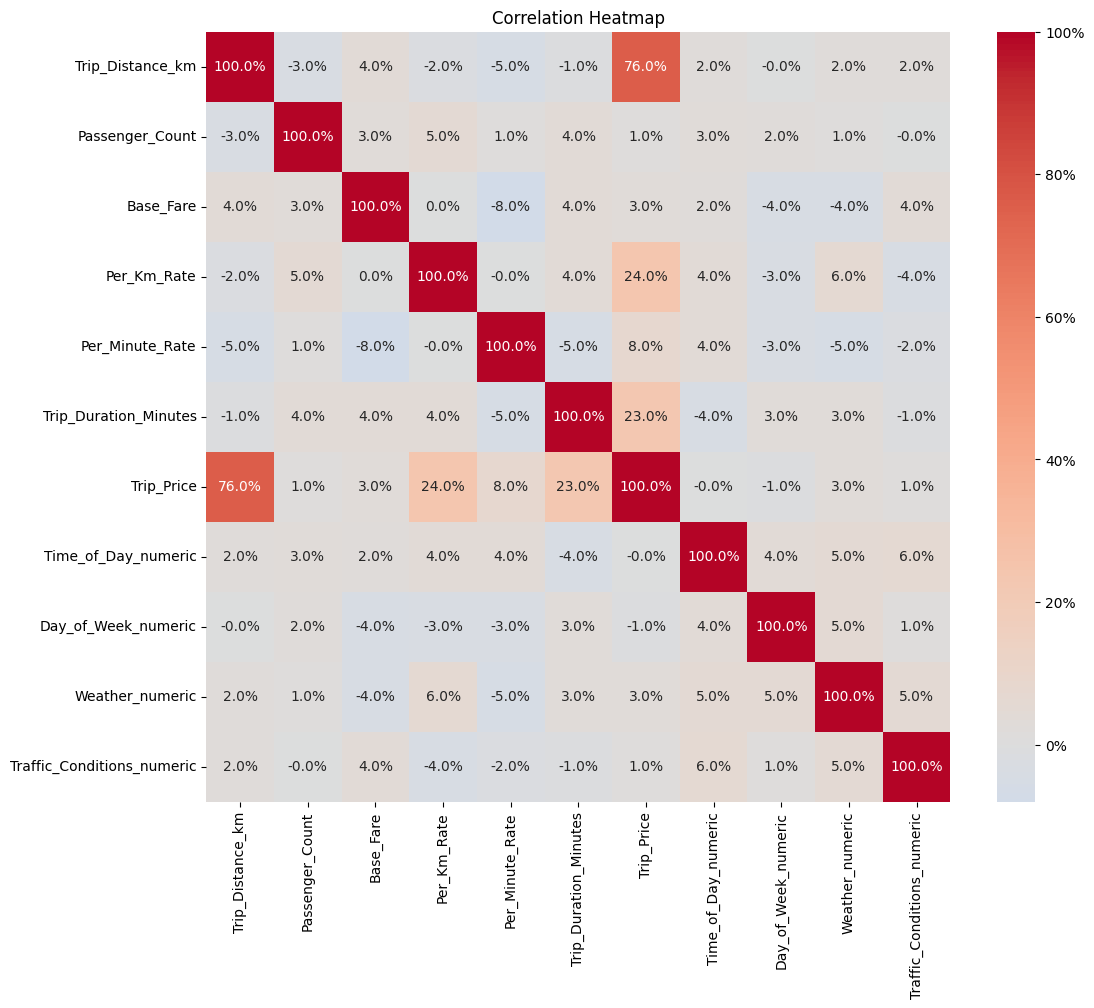

In [221]:
numerical_columns =  data.select_dtypes('float64').corr().round(2)
corr_percentage = (numerical_columns * 100)

def custom_format(x): 
    return f'{x:.1f}%'
plt.figure(figsize=(12,10))
sns.heatmap(corr_percentage, cmap='coolwarm', annot=True, fmt='', annot_kws={"size": 10}, center=0, cbar_kws={'format': '%.0f%%'})
for text in plt.gca().texts: 
      text.set_text(custom_format(float(text.get_text())))
plt.title('Correlation Heatmap')
plt.show()

The most correlated things are the:

 - Trip_Price vs Trip_Distance with **80%**
 - Trip_Price vs Per_Km_Rate with **27%**
 - Trip_Price vs Trip_Duration_Minutes with **22%**

As you can see here:

In [222]:
columns_analysis = data.select_dtypes(include=["number"]).columns
data_corr = data[columns_analysis].corr().round(1)
sort_corr = data_corr["Trip_Price"]
sort_corr_percentage_sorted = sort_corr.sort_values(ascending=False).apply(lambda x: f"{x * 100:.1f}%")
print(sort_corr_percentage_sorted[1:])

Trip_Distance_km              80.0%
Per_Km_Rate                   20.0%
Trip_Duration_Minutes         20.0%
Per_Minute_Rate               10.0%
Base_Fare                      0.0%
Passenger_Count                0.0%
Time_of_Day_numeric           -0.0%
Day_of_Week_numeric           -0.0%
Weather_numeric                0.0%
Traffic_Conditions_numeric     0.0%
Name: Trip_Price, dtype: object


### 3-2 **Identify outliers**

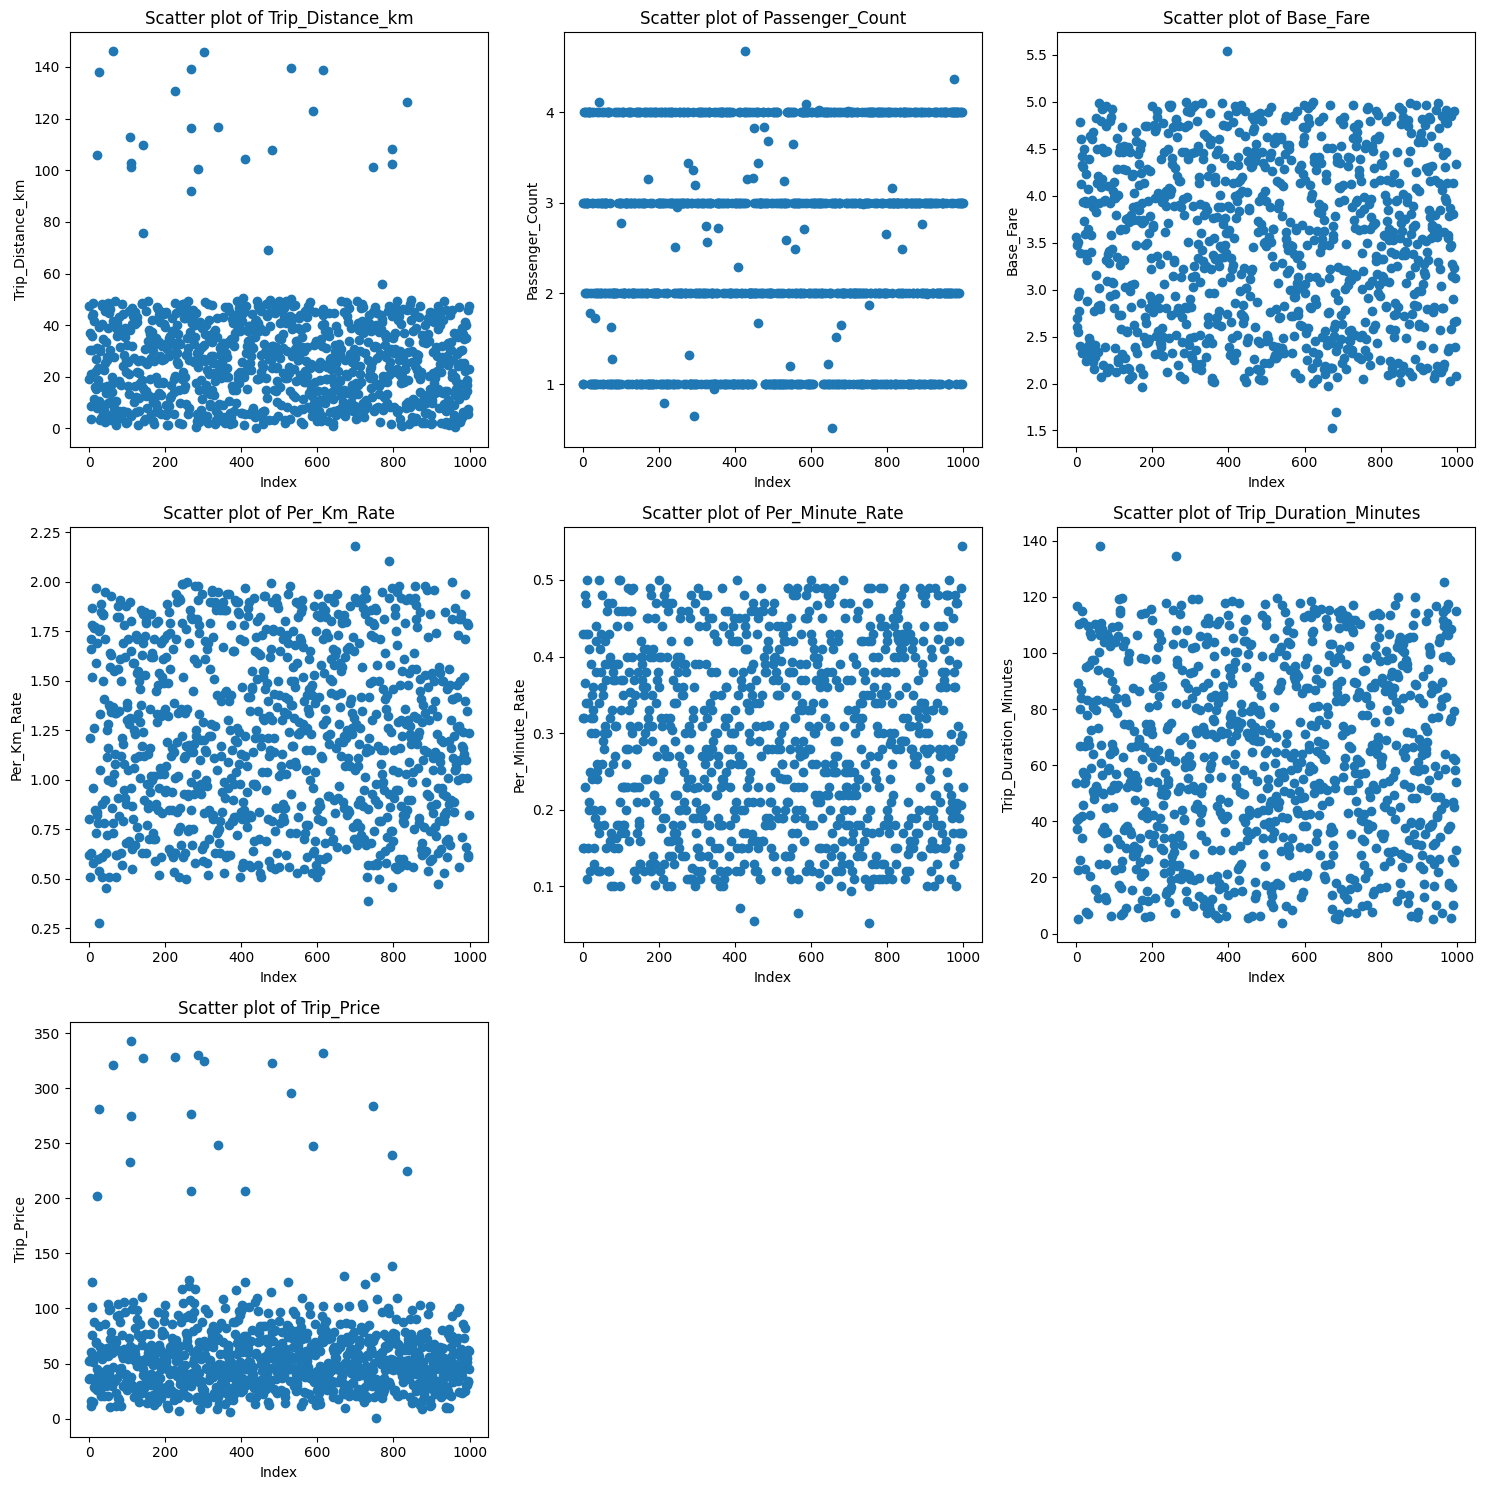

In [223]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) 
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3 
    axes[row, col].scatter(range(len(columns_to_plot)), columns_to_plot[column]) 
    axes[row, col].set_title(f'Scatter plot of {column}') 
    axes[row, col].set_xlabel('Index') 
    axes[row, col].set_ylabel(column) 
for i in range(3): 
    for j in range(3): 
        if 3 * i + j >= len(columns): 
            fig.delaxes(axes[i, j]) 
plt.tight_layout()
plt.show()

In [224]:
data[data <1].sum()

Trip_Distance_km                2.238899
Passenger_Count                 0.000000
Base_Fare                       0.000000
Per_Km_Rate                   258.176689
Per_Minute_Rate               290.981285
Trip_Duration_Minutes           0.000000
Trip_Price                      0.643785
Time_of_Day_numeric             0.000000
Day_of_Week_numeric             0.000000
Weather_numeric                 0.000000
Traffic_Conditions_numeric      0.000000
dtype: float64

# 4 - Building the Model

In [248]:

X = data.drop("Trip_Price", axis=1)
y = data["Trip_Price"]
target_data = data[data["Trip_Price"].isna()]

In [249]:
y.shape

(1000,)

In [250]:
X.shape

(1000, 10)

In [251]:
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.3) # 30% test and 70% for train

##### Models we will use

In [252]:
model = {"Linear_Regression" : LinearRegression(),
        "RandomForest_Regressor" : RandomForestRegressor(),
        "GradientBoosting_Regressor": GradientBoostingRegressor()}

In [253]:
x_test.isnull().sum()

Trip_Distance_km              0
Passenger_Count               0
Base_Fare                     0
Per_Km_Rate                   0
Per_Minute_Rate               0
Trip_Duration_Minutes         0
Time_of_Day_numeric           0
Day_of_Week_numeric           0
Weather_numeric               0
Traffic_Conditions_numeric    0
dtype: int64

In [254]:
x_train.isnull().sum()


Trip_Distance_km              0
Passenger_Count               0
Base_Fare                     0
Per_Km_Rate                   0
Per_Minute_Rate               0
Trip_Duration_Minutes         0
Time_of_Day_numeric           0
Day_of_Week_numeric           0
Weather_numeric               0
Traffic_Conditions_numeric    0
dtype: int64

In [255]:
y_test.isnull().sum()


np.int64(0)

In [256]:
y_train.isnull().sum()

np.int64(0)

In [262]:
models = {"LinearRegression":LinearRegression(),"RandomForestRegressor":RandomForestRegressor(),"GradientBoostingRegressor":GradientBoostingRegressor()}
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}
for model_name, model in models.items():
    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)


results_df = pd.DataFrame(results)
print(results_df)

                       Model         MSE        MAE        R²
0           LinearRegression  371.242369  11.919644  0.772220
1      RandomForestRegressor  292.128205   8.690247  0.820761
2  GradientBoostingRegressor  338.624244   8.640046  0.792233


In [100]:
print(len(predict_price))
print(data['Trip_Price'].isnull().sum())


300
49


In [ ]:
x_train.shape

In [ ]:
y_train.shape